## Masked Autoencoders: Visualization Demo

This is a visualization demo using our pre-trained MAE models. No GPU is needed.

### Prepare
Check environment. Install packages if in Colab.


In [1]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

sys.path.append('..')
import models_mae_v2 as models_mae

/home/radu/Documents/VIRTUAL_ENVS/cata_2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Define utils

In [2]:
def show_image(image, title=''):
    # image is [H, W, 3]
    plt.imshow(image)
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model


def scale01(x):
    return (x - x.min()) / (x.max() - x.min())


def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.0)
    y = model.unpatchify(y)
    y = y.detach().cpu()

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [32, 32]

    plt.subplot(1, 2, 1)
    show_image(scale01(x[0].permute(1, 2, 0)), "original")
    
    plt.subplot(1, 2, 2)
    show_image(scale01(y[0].permute(1, 2, 0)), "reconstruction")
    return scale01(y[0].permute(1, 2, 0))



### Load an image

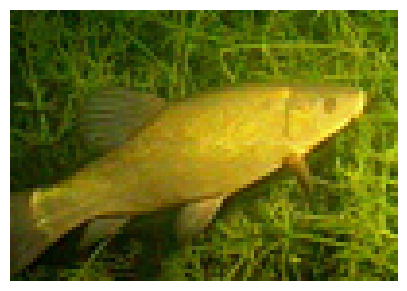

In [3]:
img  = Image.open(r"/home/radu/Documents/sample_dataset_imagenet/train/fish/n01440764_297.JPEG")
# img  = Image.open(r"/home/radu/Documents/sample_dataset_imagenet/train/fish/n01440764_97.JPEG")


plt.rcParams['figure.figsize'] = [5, 5]
show_image(img)

### Load a pre-trained MAE model

In [16]:
chkpt_dir = '/home/radu/Projects/mae-iter/output_dir/checkpoint-500.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_base_patch16')
print('Model loaded.')

chkpt_dir2 = '/home/radu/Projects/mae-iter/output_dir/checkpoint-1000.pth'
model_mae2 = prepare_model(chkpt_dir2, 'mae_vit_base_patch16')
print('Model loaded.')

<All keys matched successfully>
Model loaded.
<All keys matched successfully>
Model loaded.


### Run MAE on the image

/tmp/ipykernel_539798/3145480724.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


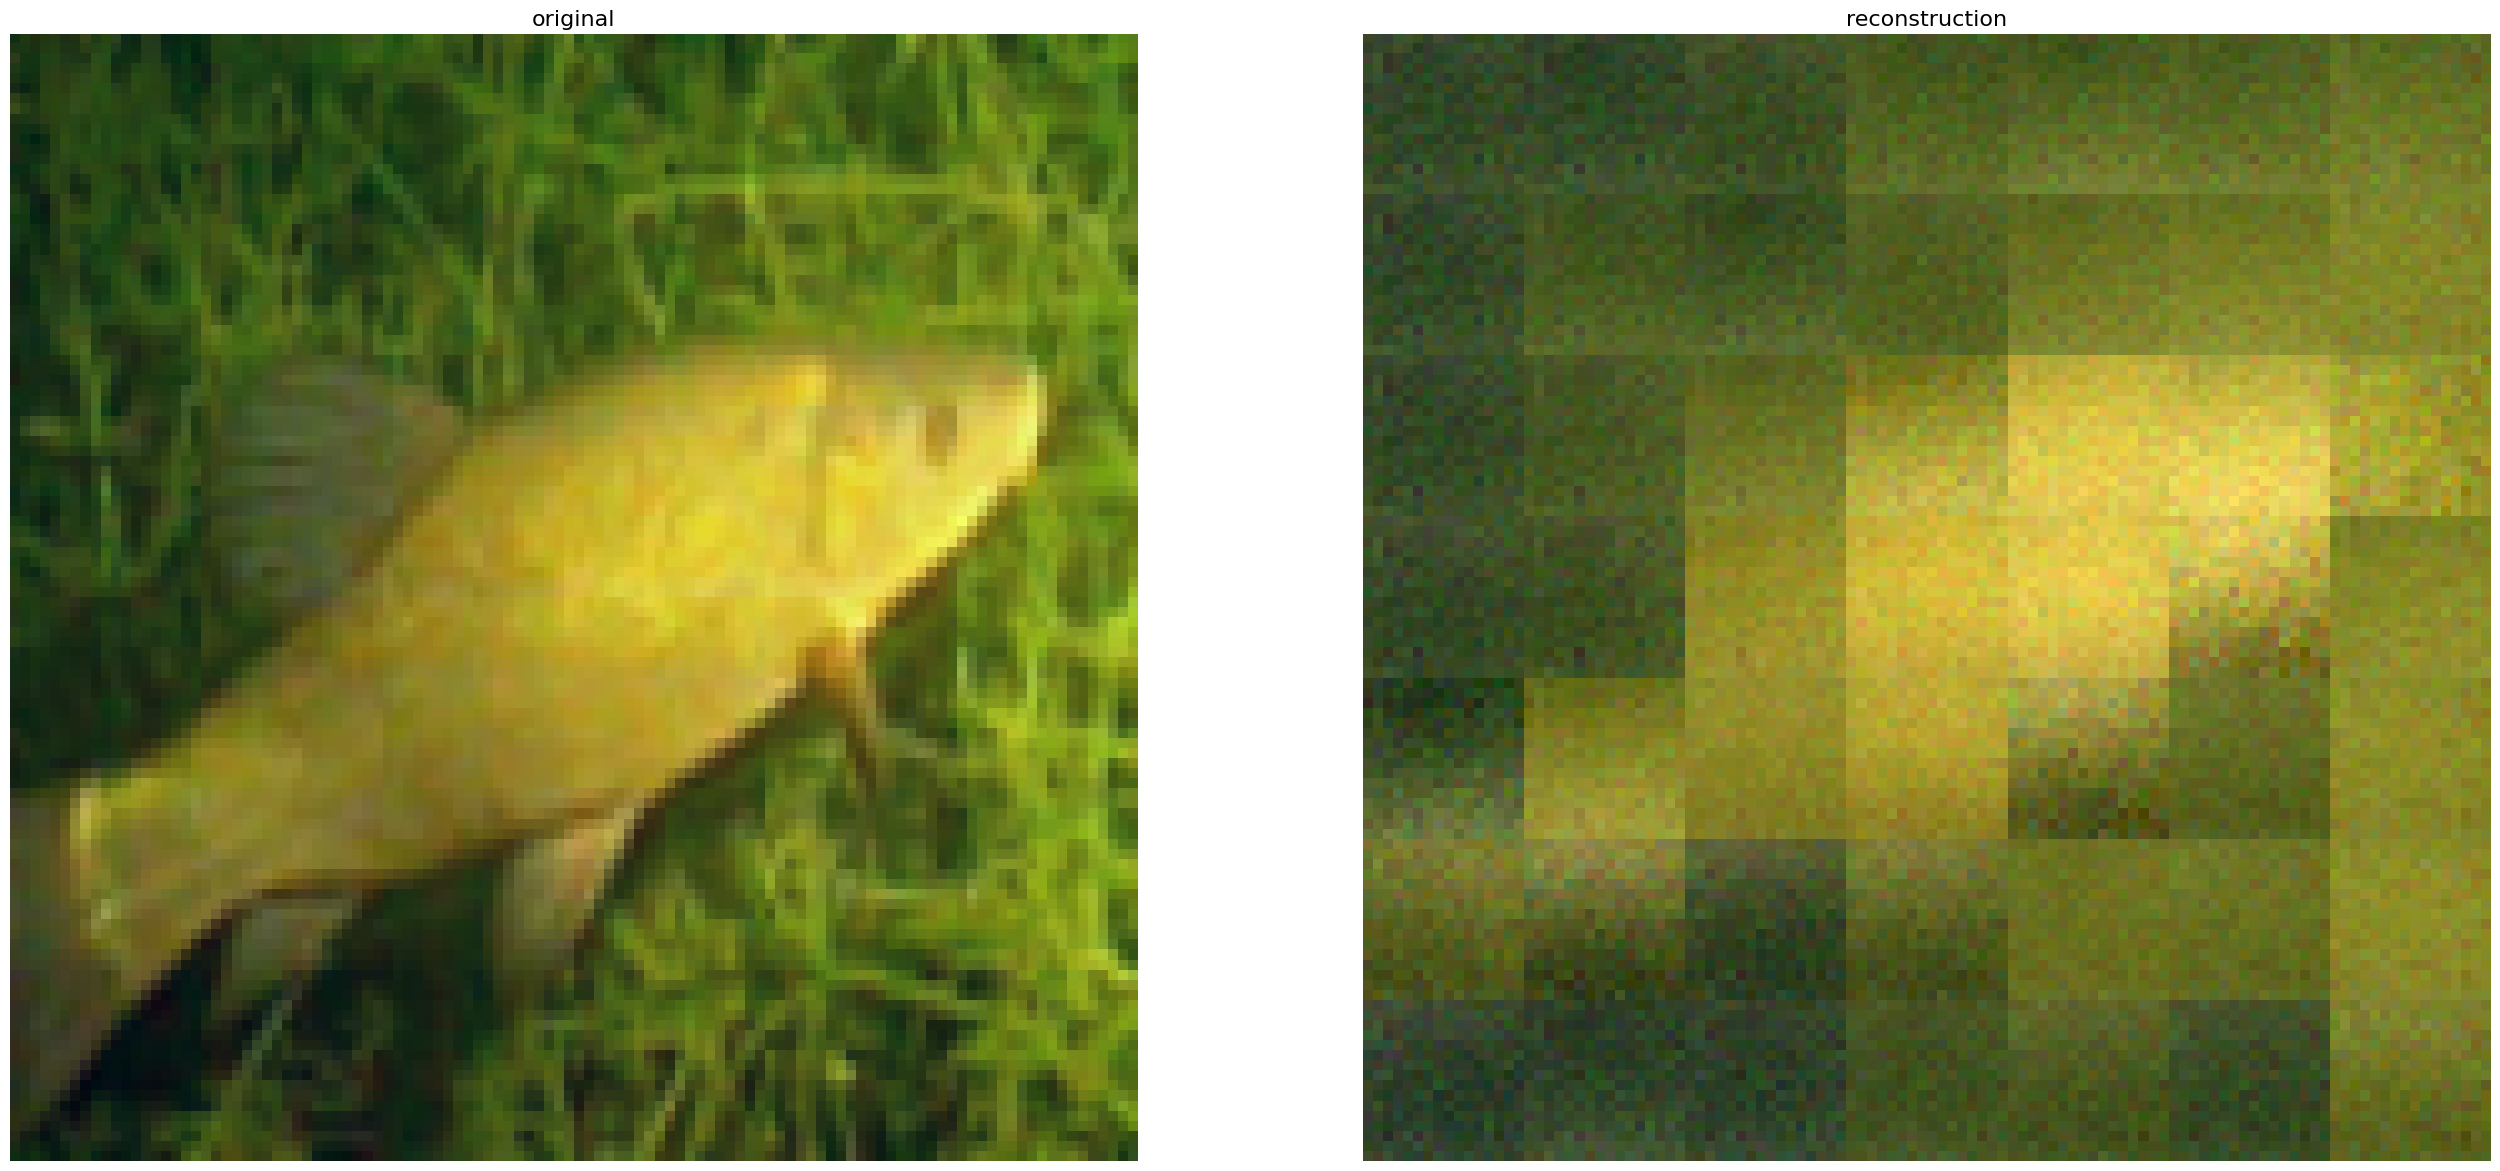

In [17]:
transform_train = transforms.Compose([
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

y1 = run_one_image(transform_train(img), model_mae)


/tmp/ipykernel_539798/3145480724.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


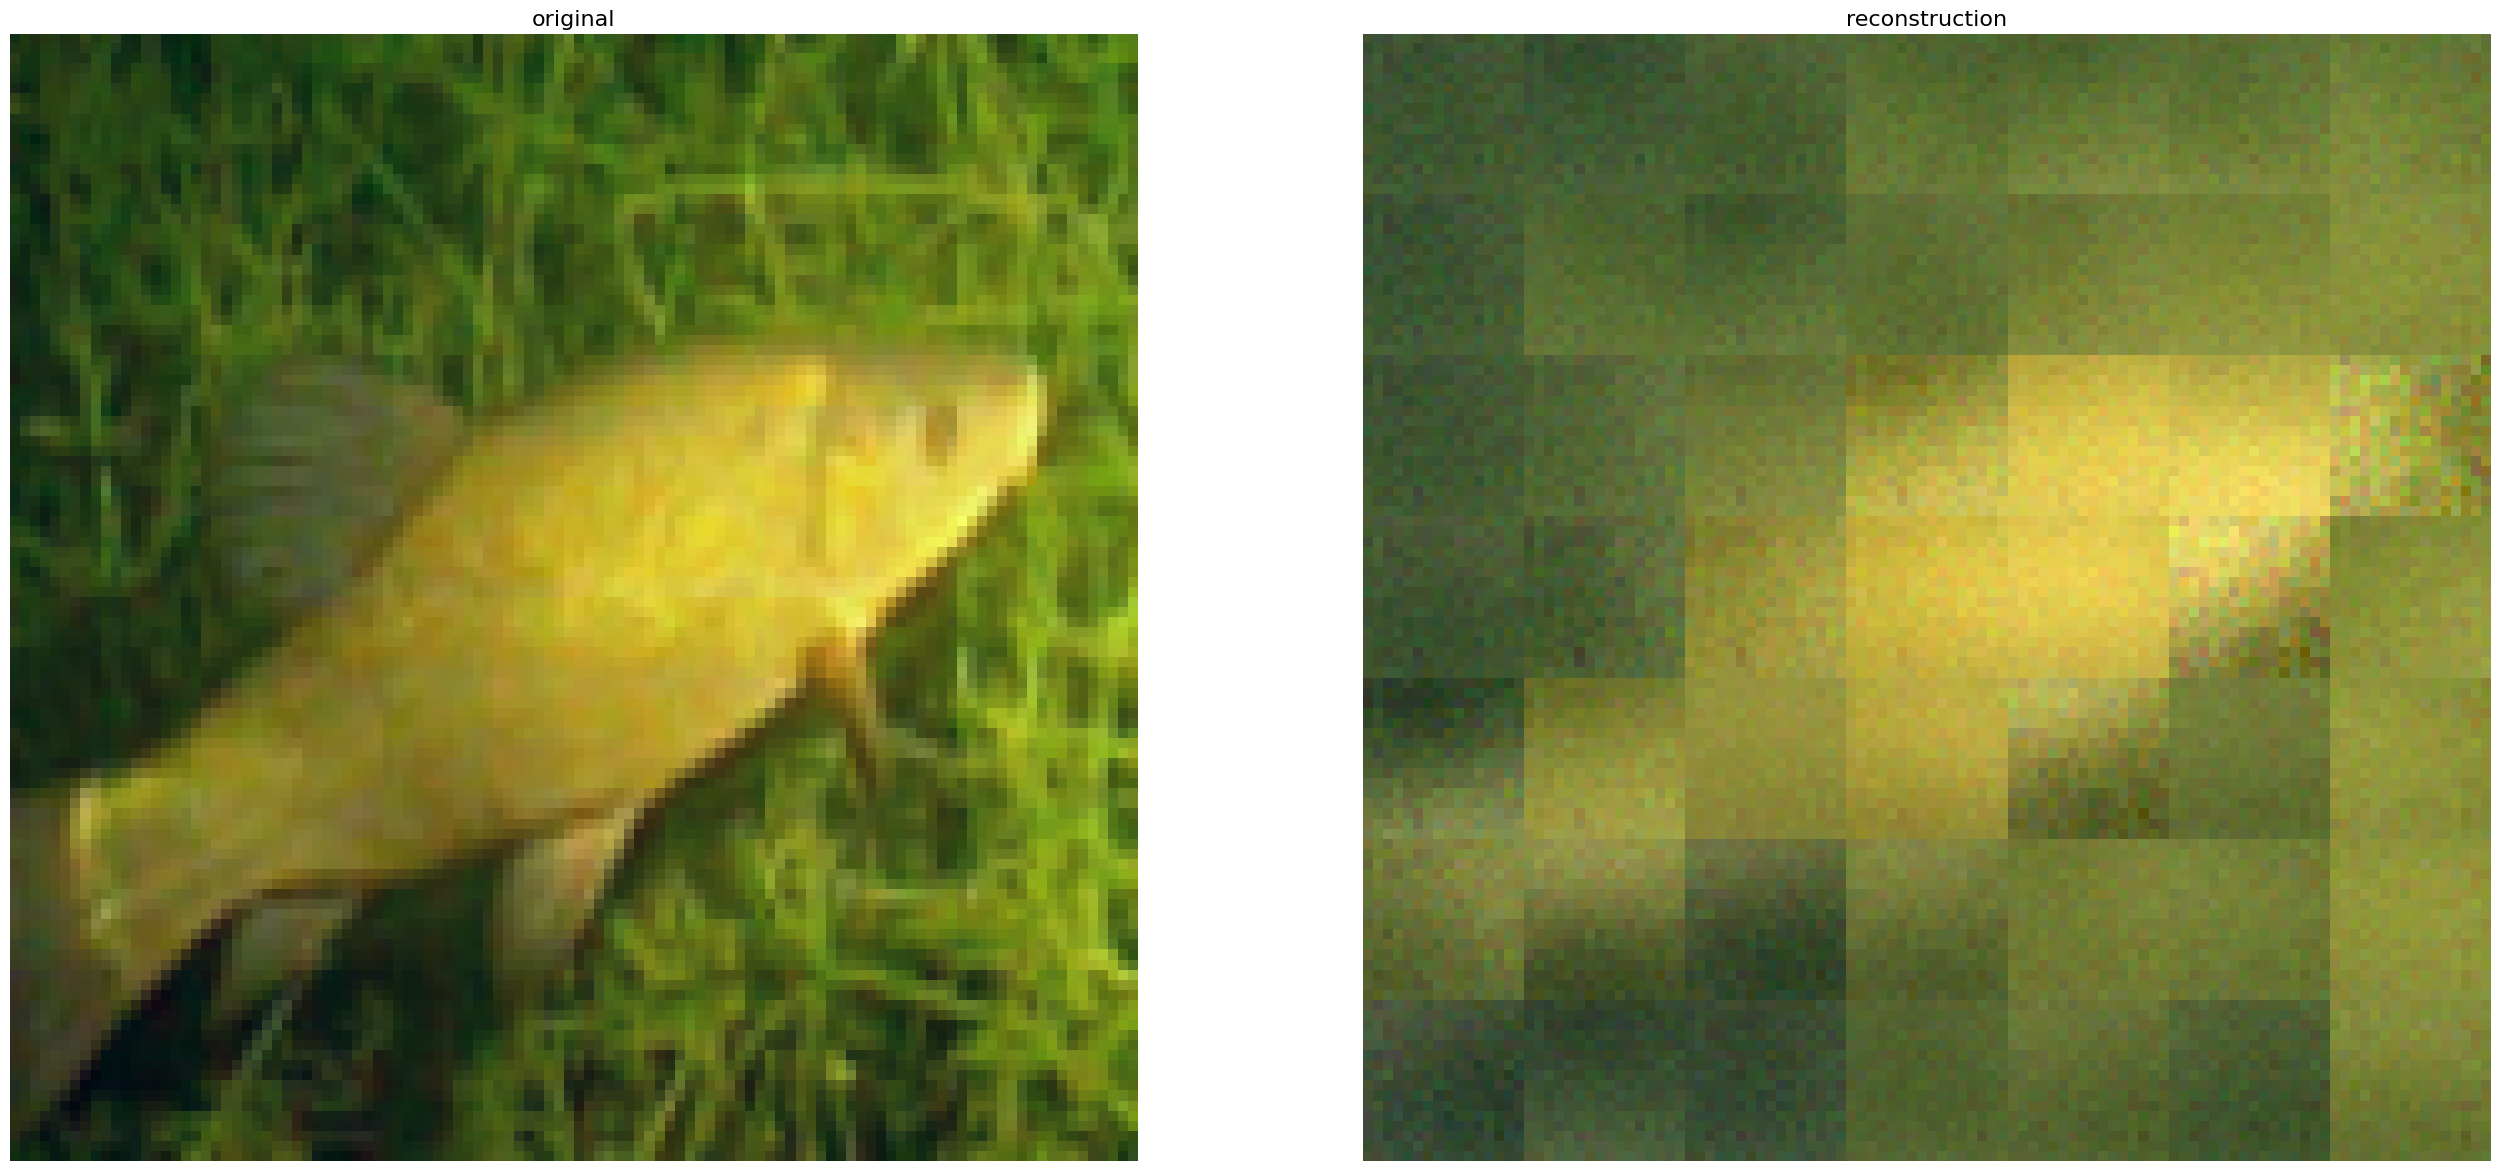

In [18]:
y2 = run_one_image(transform_train(img), model_mae2)

In [11]:
y1-y2

tensor([[[ 0.3784,  0.1657,  0.2358],
         [ 0.3959,  0.2068,  0.5258],
         [ 0.4291,  0.1584,  0.4770],
         ...,
         [ 0.0546,  0.1384,  0.4237],
         [ 0.1558,  0.3457,  0.1657],
         [ 0.1147, -0.1142,  0.4514]],

        [[ 0.5520,  0.3035,  0.3794],
         [ 0.3257,  0.5932,  0.2793],
         [ 0.4778,  0.4206,  0.3177],
         ...,
         [ 0.2681,  0.0793,  0.4558],
         [ 0.0229,  0.1627,  0.5068],
         [ 0.1303,  0.0927,  0.2873]],

        [[ 0.3211,  0.1548,  0.3639],
         [ 0.1764,  0.3433,  0.3943],
         [ 0.3600,  0.3993,  0.3490],
         ...,
         [ 0.2458, -0.0638,  0.3948],
         [ 0.0292,  0.0613,  0.4132],
         [-0.1176,  0.1550,  0.2970]],

        ...,

        [[ 0.1945,  0.0954,  0.2440],
         [ 0.5477,  0.4083,  0.3058],
         [ 0.2749,  0.2127,  0.4889],
         ...,
         [ 0.2050, -0.0747,  0.3435],
         [ 0.2117,  0.5516,  0.3462],
         [-0.1583,  0.2368,  0.2783]],

        [[